In [2]:
from sympy import *
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
%matplotlib inline
init_printing()

# I. dio: Lagrangean i E.-L. jednadžbe

In [17]:
#Parametri
t,g,k,m,L0=symbols('t,g,k,m,L_0')

#Varijable vremena
r,theta=symbols('r,theta',cls=Function)
r=r(t)
theta=theta(t)

x=r*sin(theta)
y=r*cos(theta)

xdot=diff(x,t)
ydot=diff(y,t)
rdot=diff(r,t)
thetadot=diff(theta,t)

xdotdot=diff(xdot,t)
ydotdot=diff(ydot,t)
rdotdot=diff(rdot,t)
thetadotdot=diff(thetadot,t)

#Energije i Lagranžijan
T=(m/2*(xdot**2+ydot**2)).simplify()
#T.simplify()
U=((k*(r-L0)**2)/2-m*g*r*cos(theta)).simplify()

L=(T-U).simplify()
#L.simplify()

#E.-L. jednadžbe
LEr=(diff(diff(L,rdot),t)-diff(L,r)).simplify()
LEtheta=(diff(diff(L,thetadot),t)-diff(L,theta)).simplify()

#Rješenja
solrdotdot=( solveset(LEr,rdotdot).args[0] ).simplify()
solthetadotdot=( solveset(LEtheta,thetadotdot).args[0] ).simplify()
solthetadotdot

# II. dio: Grafovi

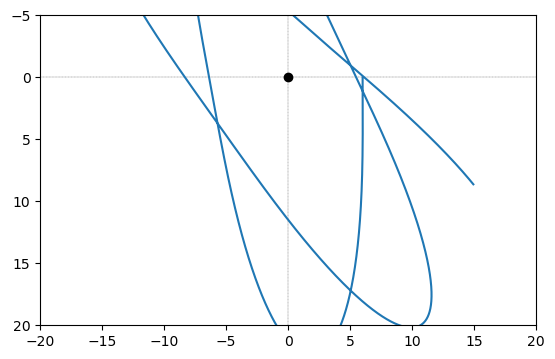

In [14]:
#Funkcija za Eulerovu metodu
def Njihalo(masa,konstanta,Lpoc,x0,y0,vx0,vy0,vrijeme):
    #parametri
    t1=0; dt=0.001;
    g1=9.81
    
    #početni uvjeti i transformacije u Kart.
    r0=np.sqrt( x0**2 + y0**2 )
    if y0!=0:
        theta0=np.arctan(x0/y0)
    elif x0>0:
        theta0=np.pi/2
    else:
        theta0=-np.pi/2
        
    rdot0=vx0*np.sin(theta0) - vy0*np.cos(theta0)
    thetadot0=-vx0*np.cos(theta0) - vy0*np.sin(theta0)
    
    r1=r0
    theta1=theta0
    rdot1=rdot0
    thetadot1=thetadot0
    
    xs,ys=[],[]
    
    #Eulerov algoritam
    while t1 < vrijeme:
        rdotdot1=solrdotdot.subs({Derivative(theta,t):thetadot1,m:masa,k:konstanta,L0:Lpoc,theta:theta1,r:r1,g:g1})
        thetadotdot1=solthetadotdot.subs({Derivative(r,t):rdot1,Derivative(theta,t):thetadot1,m:masa,k:konstanta,L0:Lpoc,theta:theta1,r:r1,g:g1})
       
        rdot1 += rdotdot1*dt
        thetadot1 += thetadotdot1*dt
        
        r1 += rdot1*dt
        theta1 += thetadot1*dt
        xs.append(r1*np.sin(np.float64(theta1)))
        ys.append(r1*np.cos(np.float64(theta1)))
        
        t1+=dt
 
    plt.xlim(-20,20)
    plt.ylim(20,-5)
    
    plt.axis("scaled")
    plt.scatter(0,0,marker='o',color="black")
    plt.axhline(0,linestyle="--",color="black",linewidth=0.2)
    plt.axvline(0,linestyle="--",color="black",linewidth=0.2)
    plt.plot(xs,ys)
    
Njihalo(masa=4,konstanta=30,Lpoc=6,x0=6,y0=0,vx0=0,vy0=7,vrijeme=6)
# za sada se čini da ovo dosta dobro funkcionira, nekad izgleda kao dao izdivergira, možda ne 

- provjeriti jesu li dobre brzine (predznaci, itd.)
- napraviti graf energija i ukupne E
- napraviti grid plotova

Rješenje Eulerovom metodom uz korak dt=0.01 izdivergira za vrijeme=6 sekundi, zbog bilo kojeg razloga. Zato idemo drugom _odeint_ metodom u drugoj bilježnici.